In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160604)

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [5]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


/Users/tsubasa/.pyenv/versions/3.7.3/lib/python3.7/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [9]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:mnist.test.images, t:mnist.test.labels})
        print('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Step: 100, Loss: 5392.576172, Accuracy: 0.878900
Step: 200, Loss: 4518.516602, Accuracy: 0.891200
Step: 300, Loss: 4084.891602, Accuracy: 0.897600
Step: 400, Loss: 3805.237305, Accuracy: 0.903700
Step: 500, Loss: 3592.421631, Accuracy: 0.906100
Step: 600, Loss: 3458.769043, Accuracy: 0.909100
Step: 700, Loss: 3351.752441, Accuracy: 0.910300
Step: 800, Loss: 3268.325928, Accuracy: 0.912100
Step: 900, Loss: 3183.582275, Accuracy: 0.914300
Step: 1000, Loss: 3111.338623, Accuracy: 0.914200
Step: 1100, Loss: 3069.455078, Accuracy: 0.914900
Step: 1200, Loss: 3026.444336, Accuracy: 0.916900
Step: 1300, Loss: 2986.124512, Accuracy: 0.916300
Step: 1400, Loss: 2956.651855, Accuracy: 0.917700
Step: 1500, Loss: 2922.793945, Accuracy: 0.918900
Step: 1600, Loss: 2926.542480, Accuracy: 0.918600
Step: 1700, Loss: 2913.699951, Accuracy: 0.918700
Step: 1800, Loss: 2876.328857, Accuracy: 0.918100
Step: 1900, Loss: 2855.454590, Accuracy: 0.920200
Step: 2000, Loss: 2849.957764, Accuracy: 0.920400


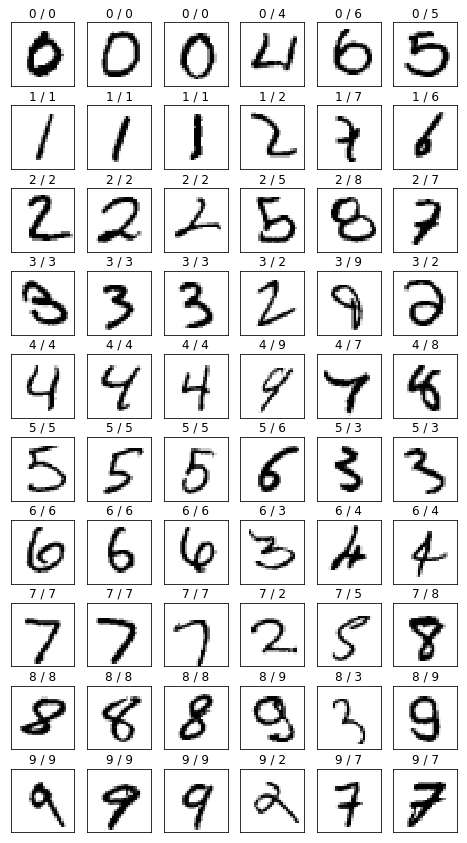

In [10]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x: images, t: labels})

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break